In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
# Read the file
X = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/airbnb-rentalprice/task6-modeling/X_scaled.csv')
y = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/airbnb-rentalprice/task6-modeling/y.csv')

In [4]:
X.head(5)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths,...,NearestStation_Σύνταγμα,neighbourhood_ΑΚΡΟΠΟΛΗ,neighbourhood_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,neighbourhood_ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,property_type_Boutique hotel,property_type_Condo,property_type_Home,property_type_Rental unit,property_type_Serviced apartment,room_type_Entire home/apt
0,1.0,0.0454,0.017042,0.055046,0.380822,0.041451,0.953678,0.090909,0.083333,0.222222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0454,0.017042,0.055046,0.380822,0.041451,0.953678,0.090909,0.083333,0.222222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0454,0.017042,0.055046,0.380822,0.041451,0.953678,0.090909,0.083333,0.222222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0454,0.017042,0.055046,0.380822,0.041451,0.953678,0.090909,0.083333,0.222222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0454,0.017042,0.055046,0.380822,0.041451,0.953678,0.090909,0.083333,0.222222,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
y.head(5)

,price
0,200
1,200
2,200
3,200
4,200


In [6]:
X.shape

(459972, 23)

In [7]:
y.shape

(459972, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(objective='reg:squarederror')
]

# Define the number of folds and other parameters
n_folds = 5
random_state = 2020
kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)

# Lists to store results
model_names = []
cv_scores_rmse_list = []
mean_rmse_list = []
std_rmse_list = []

# Loop through each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    
    # Convert scores from negative MSE to RMSE
    cv_scores_rmse = np.sqrt(-cv_scores)
    
    mean_score = np.mean(cv_scores_rmse)
    std_score = np.std(cv_scores_rmse)
    
    print("Cross-Validation RMSE Scores:", cv_scores_rmse)
    print(f"Mean RMSE: {mean_score:.5f} (std: {std_score:.5f})")
    print("=" * 40)
    
    # Store results in lists
    model_names.append(model_name)
    cv_scores_rmse_list.append(cv_scores_rmse)
    mean_rmse_list.append(mean_score)
    std_rmse_list.append(std_score)

# Create a DataFrame
results_df = pd.DataFrame({
    "Model": model_names,
    "CV RMSE Scores": cv_scores_rmse_list,
    "Mean RMSE": mean_rmse_list,
    "Std Dev RMSE": std_rmse_list
})


Model: LinearRegression
Cross-Validation RMSE Scores: [67.79677787 70.28051384 68.15334224 70.39201742 69.44630263]
Mean RMSE: 69.21379 (std: 1.06889)
Model: Ridge
Cross-Validation RMSE Scores: [67.79678737 70.28172102 68.15475571 70.38931606 69.44641303]
Mean RMSE: 69.21380 (std: 1.06826)
Model: Lasso
Cross-Validation RMSE Scores: [76.85418932 79.68810428 77.51321036 78.86934282 78.29302266]
Mean RMSE: 78.24357 (std: 0.99444)
Model: DecisionTreeRegressor
Cross-Validation RMSE Scores: [3.37856627 6.852797   5.48788882 4.42232138 4.68903226]
Mean RMSE: 4.96612 (std: 1.15971)
Model: RandomForestRegressor


C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Cross-Validation RMSE Scores: [3.22553271 4.01670279 3.40056946 3.98140941 4.67938665]
Mean RMSE: 3.86072 (std: 0.51465)
Model: ExtraTreesRegressor


C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Cross-Validation RMSE Scores: [2.58710107 3.24889028 2.46357015 3.72628253 3.90684271]
Mean RMSE: 3.18654 (std: 0.58242)
Model: AdaBoostRegressor


C:\Users\chimi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross-Validation RMSE Scores: [174.79111322 134.81164078 194.35662888 161.08893515 180.00425674]
Mean RMSE: 169.01051 (std: 20.14457)
Model: GradientBoostingRegressor


C:\Users\chimi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chimi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Cross-Validation RMSE Scores: [52.17966048 54.70001116 53.62647747 55.57978975 55.67173226]
Mean RMSE: 54.35153 (std: 1.31269)
Model: XGBRegressor
Cross-Validation RMSE Scores: [17.13804902 17.41782356 17.10726362 18.11144827 17.34409487]
Mean RMSE: 17.42374 (std: 0.36362)
                       Model  \
0           LinearRegression   
1                      Ridge   
2                      Lasso   
3      DecisionTreeRegressor   
4      RandomForestRegressor   
5        ExtraTreesRegressor   
6          AdaBoostRegressor   
7  GradientBoostingRegressor   
8               XGBRegressor   

                                      CV RMSE Scores   Mean RMSE  Std Dev RMSE  
0  [67.79677786749242, 70.28051384036704, 68.1533...   69.213791      1.068892  
1  [67.79678736906213, 70.28172102275198, 68.1547...   69.213799      1.068260  
2  [76.85418932097892, 79.68810427833901, 77.5132...   78.243574      0.994437  
3  [3.3785662696755043, 6.852796996509001, 5.4878...    4.966121      1.159708  


In [12]:
results_df

,Model,CV RMSE Scores,Mean RMSE,Std Dev RMSE
0,LinearRegression,"[67.79677786749242, 70.28051384036704, 68.1533...",69.213791,1.068892
1,Ridge,"[67.79678736906213, 70.28172102275198, 68.1547...",69.213799,1.068260
2,Lasso,"[76.85418932097892, 79.68810427833901, 77.5132...",78.243574,0.994437
3,DecisionTreeRegressor,"[3.3785662696755043, 6.852796996509001, 5.4878...",4.966121,1.159708
4,RandomForestRegressor,"[3.2255327147762847, 4.016702793027859, 3.4005...",3.860720,0.514648
5,ExtraTreesRegressor,"[2.5871010742360827, 3.248890280132556, 2.4635...",3.186537,0.582419
6,AdaBoostRegressor,"[174.79111321960568, 134.81164077633858, 194.3...",169.010515,20.144565
7,GradientBoostingRegressor,"[52.17966047592088, 54.70001116441472, 53.6264...",54.351534,1.312685
8,XGBRegressor,"[17.138049018549196, 17.417823555986352, 17.10...",17.423736,0.363620


In [ ]:
# Skipping HyperParameter tuning due to computational limitation from my labtop
# 

C:\Users\chimi\AppData\Local\Temp\ipykernel_19828\3583654741.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)


Mean Absolute Error on Test Data: 20.184159710988066
Root Mean Squared Error on Test Data: 35.06965349161746
R-squared (R2) Score: 0.8694


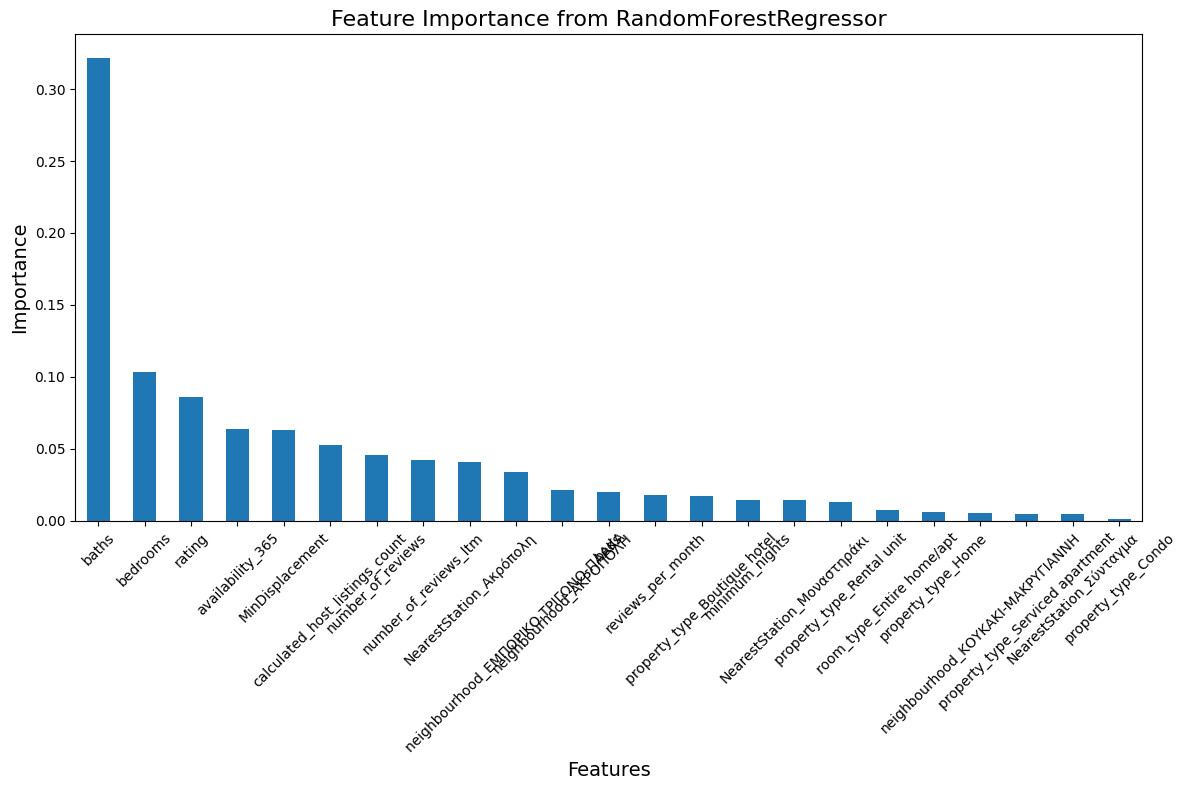

In [19]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the RandomForestRegressor with the optimal hyperparameters
best_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training dataset
best_model.fit(X_train, y_train)

# Evaluate the model on the test dataset
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE using MSE
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error on Test Data: {mae}")
print(f"Root Mean Squared Error on Test Data: {rmse}")
print(f"R-squared (R2) Score: {r2:.4f}")
# Plot feature importances
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title("Feature Importance from RandomForestRegressor", size=16)
plt.xlabel("Features", size=14)
plt.ylabel("Importance", size=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# R square of R^2 of 0.8694 indicates that regression model is able to capture substantial amount of 
# variability in the target variable based on the provided features.

In [25]:
# Save the trained model to a file to streamlit app
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Show the feature importances plot
plt.show()

In [26]:
best_model

RandomForestRegressor(max_depth=10, random_state=42)